**Laboratorio N°1 - SIS420**

**Introducción.**

  En este cuadernillo de Python, abordaremos el proceso de entrenamiento y evaluación de modelos de regresión multivariable utilizando un dataset específico. El objetivo principal es comprender y aplicar diferentes técnicas de regresión, incluyendo la regresión lineal multivariable, la regresión polinómica y el cálculo de parámetros por la ecuación normal. Utilizaremos un conjunto de datos que cumpla con ciertos criterios establecidos, incluyendo al menos 6 propiedades y más de 10,000 ejemplos.

**Objetivos.**
  - Seleccionar un dataset adecuado que cumpla con los requisitos de tamaño y características necesarias.
  - Implementar modelos de regresión lineal multivariable, regresión polinómica y cálculo de parámetros por la ecuación normal en Python.
  - Entrenar y validar cada modelo utilizando técnicas adecuadas de división de datos y validación cruzada.
  - Evaluar la efectividad de cada modelo mediante la realización de predicciones y análisis de métricas de evaluación.
  - Generar gráficos de costo para cada modelo y explicar su comportamiento.



In [181]:
print(f"Laboratorio N°1 - SIS420: Gabriel Aparicio Llanquipacha.")
print(f"Carrera: Ingeniería en Ciencias de la Computación.")

Laboratorio N°1 - SIS420: Gabriel Aparicio Llanquipacha.
Carrera: Ingeniería en Ciencias de la Computación.


**(0) Montar Google Drive en Colaboratoy y determinar las librerías.** Una vez que el Google Drive está montado, puedes acceder a los archivos almacenados en tu Google Drive directamente desde el entorno de Colaboratory. El declarar las librerías permite acceder a las funciones de las mismas, las cuales usaremos para trabajar en este cuadernillo.


* import os: Interactuar con el sistema operativo.
* import pandas as pd: Manipular y analizar datos tabulares.
* import numpy as np: Computación numérica eficiente.
* from matplotlib import pyplot as plt: Visualizar datos y gráficos.
* from mpl_toolkits.mplot3d import Axes3D: Visualizar datos tridimensionales.
* from sklearn.linear_model import LinearRegression: Implementar regresión lineal.
* from sklearn.preprocessing import PolynomialFeatures: Crear características polinómicas.
* from sklearn.metrics import mean_squared_error: Evaluar el error cuadrático medio.
* from scipy import optimize: Optimizar funciones matemáticas. from sklearn.model_selection import train_test_split: Dividir datos en entrenamiento y prueba.
* from sklearn.preprocessing import StandardScaler: Estandarizar características numéricas.
* import shutil: Manipular archivos y directorios.



In [182]:
from google.colab import drive
drive.mount("/content/gdrive")
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy import optimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import shutil
%matplotlib inline

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**(1) Regresión Logística.** Se eligió un modelo one vs all debido a las características del dataset, siendo que éstas tenían una hipótesis representable de forma binaria (0 o 1, falso o verdadero).

**(a) Establecimiento de la clase y los métodos.**


* __init__(self, _dataset): El constructor de la clase que inicializa los datos del conjunto de entrenamiento y de prueba, y también inicializa los parámetros del modelo.

* entrenar(self): Este método entrena el modelo utilizando el descenso de gradiente. Normaliza las características, grafica los datos de entrenamiento, calcula los parámetros theta y el costo J, y luego grafica el costo en función del número de iteraciones.

* _normalizarCaracteristicas(self, X): Normaliza las características del conjunto de datos restando la media y dividiendo por la desviación estándar.

* _graficarCosto(self, J): Grafica el costo en función del número de iteraciones durante el entrenamiento.

* _funcionSigmoide(self, z): Calcula la función sigmoide para una matriz de entrada z.

* _funcionCosto(self, X, y, theta): Calcula el costo de la regresión logística dado un conjunto de datos X, etiquetas y y parámetros theta.

* descensoGradiente(self, X, y, theta, alpha, num_iter): Realiza el descenso de gradiente para encontrar los parámetros theta que minimizan el costo.

* graficarDatos(self, X, y): Grafica los datos de entrenamiento con dos clases.

* _preprocesarDataset(self, _dataset): Lee el conjunto de datos desde un archivo CSV, realiza el preprocesamiento necesario como la eliminación de duplicados y la conversión de datos categóricos a numéricos, y devuelve el conjunto de datos preprocesado.

* realizarPredicciones(self, X, theta): Realiza predicciones utilizando el modelo entrenado y los parámetros theta dados.

* calcularPorcentajeAcierto(self): Calcula el porcentaje de precisión del modelo en el conjunto de prueba y lo imprime.



In [184]:
class RegresionLogistica:
  def __init__(self, _dataset):
    self.dataset = self._preprocesarDataset(_dataset)
    self.train_set, self.test_set = train_test_split(self.dataset, test_size=0.2, random_state=9)
    self.X_train, self.y_train = self.train_set.iloc[:, :-1], self.train_set.iloc[:, -1]
    self.X_test, self.y_test = self.test_set.iloc[:, :-1], self.test_set.iloc[:, -1]
    self.X_train = np.concatenate([np.ones((self.X_train.shape[0], 1)), self.X_train], axis=1)
    self.X_test = np.concatenate([np.ones((self.X_test.shape[0], 1)), self.X_test], axis=1)
    self.J = 0
  def entrenar(self):
    self.X_test = self._normalizarCaracteristicas(self.X_test)
    self.X_train = self._normalizarCaracteristicas(self.X_train)
    self.graficarDatos(self.X_train, self.y_train)
    self.theta = np.zeros(self.X_train.shape[1])
    self.theta, self.J = self.descensoGradiente(self.X_train, self.y_train, self.theta, 0.001, 10000)
    self._graficarCosto(self.J)
  def _normalizarCaracteristicas(self, X):
    media = np.mean(X, axis=0)
    desviacion_estandar = np.std(X, axis=0)
    desviacion_estandar[desviacion_estandar == 0] = 1
    X_norm = (X - media) / desviacion_estandar
    return X_norm
  def _graficarCosto(self, J):
      plt.plot(np.arange(len(J)), J, lw=2)
      plt.xlabel('Numero de iteraciones')
      plt.ylabel('Costo J')
  def _funcionSigmoide(self, z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g
  def _funcionCosto(self, X, y, theta):
    m = y.size
    J = 0
    h = self._funcionSigmoide(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J
  def descensoGradiente(self, X, y, theta, alpha, num_iter):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iter):
      h = self._funcionSigmoide(X.dot(theta.T))
      theta -= (alpha / m) * (h - y).dot(X)
      J_history.append(self._funcionCosto(X, y, theta))
    return theta, J_history
  def graficarDatos(self, X, y):
    fig = plt.figure()
    pos = y == 1
    neg = y == 0
    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend(['>50K', '<=50K'])
  def _preprocesarDataset(self, _dataset):
    dataset = pd.read_csv(_dataset, sep=';', header=0, decimal=',')
    dataset = dataset.fillna(0)
    datos = {}
    columnas = dataset.columns[dataset.dtypes == 'object'].tolist()
    for columna in columnas:
      datos[columna] = dataset[columna].drop_duplicates().values
    datos_num = {}
    for columna, valores in datos.items():
      indice_reemp = 0
      datos_num_col = {}
      for valor in valores:
        if valor not in datos_num_col and not pd.isnull(valor):
          datos_num_col[valor] = indice_reemp
          indice_reemp += 1
      datos_num[columna] = datos_num_col
    for columna, d_n in datos_num.items():
      dataset[columna] = dataset[columna].replace(d_n)
    return dataset
  def realizarPredicciones(self, X, theta):
    probabilidad = self._funcionSigmoide(X @ theta)
    predicciones = (probabilidad >= 0.5).astype(int)
    return predicciones
  def calcularPorcentajeAcierto(self):
    predicciones = self.realizarPredicciones(self.X_test, self.theta)
    precision = np.mean(predicciones == self.y_test) * 100
    print("Precisión de las predicciones en el conjunto de prueba: {:.10f}%".format(precision))

**(b) Realización de las predicciones.**

In [187]:
datasetLogistica = '/content/gdrive/MyDrive/SIS420/Primer_Parcial_-_SIS420/Datasets/Pregunta-N°1/Adult Census Income/adult.csv'
modeloLogistico = RegresionLogistica(datasetLogistica)

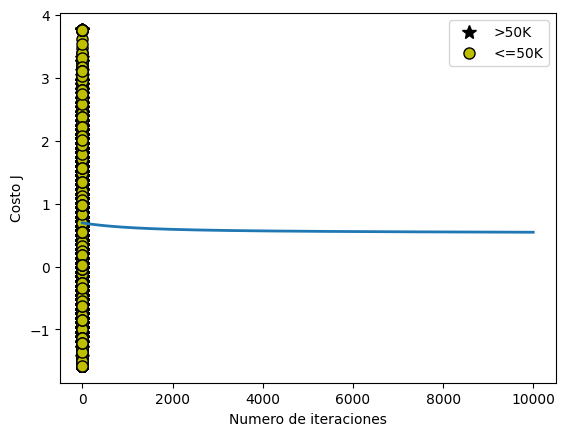

In [188]:
modeloLogistico.entrenar()

In [189]:
modeloLogistico.calcularPorcentajeAcierto()

Precisión de las predicciones en el conjunto de prueba: 72.2401351144%


**(2) Regresión One vs All.** Se eligió un modelo One vs All siendo que la última columna tenía clasificación.

**(a) Establecimiento de la clase y los métodos.**


* __init__(self, _dataset): El constructor de la clase que inicializa los datos del conjunto de entrenamiento y de prueba, y también inicializa los parámetros del modelo.

* entrenar(self): Este método entrena el modelo utilizando el descenso de gradiente. Normaliza las características, grafica los datos de entrenamiento, calcula los parámetros theta para cada clase, y luego grafica el costo en función del número de iteraciones.

* funcionCosto(self, theta, X, y, lambda_): Calcula el costo y el gradiente de la función de costo para la regresión logística con regularización.

* _funcionSigmoide(self, z): Calcula la función sigmoide para una matriz de entrada z.

* descensoGradiente(self, X, y, num_iteraciones): Realiza el descenso de gradiente para encontrar los parámetros theta que minimizan el costo para cada clase.

* _normalizarCaracteristicas(self, X): Normaliza las características del conjunto de datos restando la media y dividiendo por la desviación estándar.

* _graficarCosto(self, J): Grafica el costo en función del número de iteraciones durante el entrenamiento.

* graficarDatos(self, X, y): Grafica los datos de entrenamiento con una característica y la magnitud del terremoto.

* _preprocesarDataset(self, _dataset): Lee el conjunto de datos desde un archivo CSV, realiza el preprocesamiento necesario como la eliminación de duplicados y la conversión de datos categóricos a numéricos, y devuelve el conjunto de datos preprocesado.

* _preprocesarEspecial(self, _dataset): Realiza un preprocesamiento especial en el conjunto de datos, como la conversión de tipos de datos, el cálculo de la diferencia de tiempo, y la eliminación de columnas innecesarias.

* realizarPredicciones(self, X, theta): Realiza predicciones utilizando el modelo entrenado y los parámetros theta para cada clase.

* calcularPorcentajeAcierto(self): Calcula el porcentaje de precisión del modelo en el conjunto de prueba y lo imprime.



In [259]:
class RegresionOneVsAll:
  def __init__(self, _dataset):
    self.dataset = self._preprocesarDataset(_dataset)
    self.train_set, self.test_set = train_test_split(self.dataset, test_size=0.2, random_state=9)
    self.X_train, self.y_train = self.train_set.iloc[:, :-1], self.train_set.iloc[:, -1]
    self.X_test, self.y_test = self.test_set.iloc[:, :-1], self.test_set.iloc[:, -1]
    self.X_train = np.concatenate([np.ones((self.X_train.shape[0], 1)), self.X_train], axis=1)
    self.X_test = np.concatenate([np.ones((self.X_test.shape[0], 1)), self.X_test], axis=1)
    self.J = 0
  def entrenar(self):
   self.X_test = self._normalizarCaracteristicas(self.X_test)
   self.X_train = self._normalizarCaracteristicas(self.X_train)
   self.theta = self.descensoGradiente(self.X_train, self.y_train, 1000)
  def _funcionSigmoide(self, z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g
  def funcionCosto(self, theta, X, y, lambda_):
    m = y.size
    h = self._funcionSigmoide(X @ theta)
    costo = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    gradiente = (1 / m) * (X.T @ (h - y))
    return costo, gradiente
  def descensoGradiente(self, X, y, num_iteraciones):
    m, n = X.shape
    lambda_ = 0
    num_labels = len(np.unique(y))
    theta = np.zeros((num_labels, n))
    for c in np.arange(num_labels):
      initial_theta = np.zeros(n)
      y_onevsall = (y == c).astype(int)
      cost_function = lambda t, X, y, lambda_: self.funcionCosto(t, X, y, lambda_)[0]
      grad_function = lambda t, X, y, lambda_: self.funcionCosto(t, X, y, lambda_)[1]
      res = optimize.minimize(cost_function, initial_theta, args=(X, y_onevsall, lambda_), jac=grad_function, method='CG', options={'maxiter': num_iteraciones})
      theta[c] = res.x
    return theta
  def _normalizarCaracteristicas(self, X):
    media = np.mean(X, axis=0)
    desviacion_estandar = np.std(X, axis=0)
    desviacion_estandar[desviacion_estandar == 0] = 1
    X_norm = (X - media) / desviacion_estandar
    return X_norm
  def _preprocesarDataset(self, _dataset):
    dataset = self._preprocesarEspecial(_dataset)
    datos = {}
    columnas = dataset.columns[dataset.dtypes == 'object'].tolist()
    for columna in columnas:
      datos[columna] = dataset[columna].drop_duplicates().values
    datos_num = {}
    for columna, valores in datos.items():
      indice_reemp = 0
      datos_num_col = {}
      for valor in valores:
        if valor not in datos_num_col and not pd.isnull(valor):
          datos_num_col[valor] = indice_reemp
          indice_reemp += 1
      datos_num[columna] = datos_num_col
    for columna, d_n in datos_num.items():
      dataset[columna] = dataset[columna].replace(d_n)
    dataset = dataset.fillna(0)
    return dataset
  def _preprocesarEspecial(self, _dataset):
    dataset = pd.read_csv(_dataset, sep=';', header=0, decimal='.')
    dataset['time'] = pd.to_datetime(dataset['time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    dataset['updated'] = pd.to_datetime(dataset['updated'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    dataset['time-updated'] = (dataset['updated'] - dataset['time']).dt.total_seconds()
    dataset.drop(columns=['time', 'updated'], inplace=True)
    cols = dataset.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    dataset = dataset[cols]
    dataset['latitude'] = (dataset['latitude'].str.replace('.', '', regex=False).astype(int))
    dataset['longitude'] = (dataset['longitude'].str.replace('.', '', regex=False).astype(int))
    return dataset
  def realizarPredicciones(self, X, theta):
    m = X.shape[0]
    probabilidades = self._funcionSigmoide(X @ theta.T)
    predicciones = np.argmax(probabilidades, axis=1)
    return predicciones
  def calcularPorcentajeAcierto(self):
    predicciones = self.realizarPredicciones(self.X_test, self.theta)
    precision = np.mean(predicciones == self.y_test) * 100
    print("Precisión de las predicciones en el conjunto de prueba: {:.10f}%".format(precision))

**(b) Realización de las predicciones.**

In [260]:
datasetOneVsAll = '/content/gdrive/MyDrive/SIS420/Primer_Parcial_-_SIS420/Datasets/Pregunta-N°2/Earthquakes 2023 Globa/earthquakes_2023_global.csv'
modeloOneVsAll = RegresionOneVsAll(datasetOneVsAll)

In [ ]:
modeloOneVsAll.entrenar()

In [265]:
modeloOneVsAll.calcularPorcentajeAcierto()

Precisión de las predicciones en el conjunto de prueba: 88.3280165134%
